In [1]:
import networkx as nx;
import numpy as np;
import matplotlib;
import matplotlib.pyplot as plt;
import math;

In [61]:
import json
with open('s_chi_e-r_1000_scale_p.json') as json_file:
     data = json.load(json_file)
N = data['N'];
est_p_crit = data['est_p_crit'];
maxChi = data['maxChi'];
p_list = np.array(data['p_list']);
av_S = data['av_S'];
av_chi = data['av_chi'];

<Figure size 432x288 with 0 Axes>

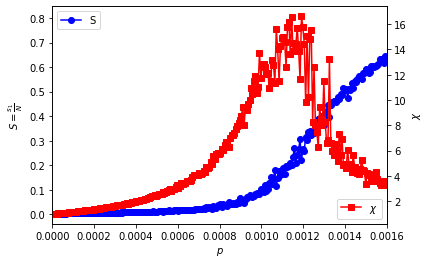

<Figure size 432x288 with 0 Axes>

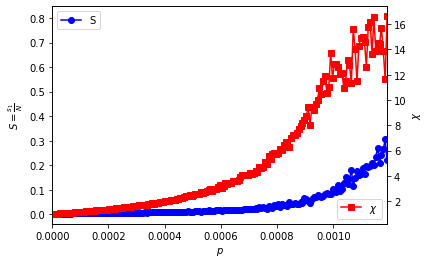

<Figure size 432x288 with 0 Axes>

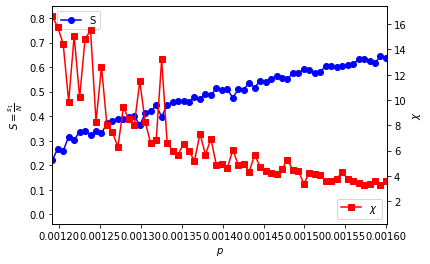

In [63]:
delta = 0.002 #0.004,0.002
mult = 0.3; #0.5, 0.3
plt.clf();
fig,ax = plt.subplots()
ax.plot(p_list,av_S,'o-',label = 'S', color = 'blue')
ax.set_ylabel(r'$S=\frac{s_1}{N}$')
ax2=ax.twinx()
ax2.plot(p_list,av_chi,'s-',label = r'$\chi$',color = 'red')
ax2.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$p$')
plt.xlim((0.0, 1/(N-1)+mult*delta))
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show();

plt.clf();
fig,ax = plt.subplots()
ax.plot(p_list,av_S,'o-',label = 'S', color = 'blue')
ax.set_ylabel(r'$S=\frac{s_1}{N}$')
ax2=ax.twinx()
ax2.plot(p_list,av_chi,'s-',label = r'$\chi$',color = 'red')
ax2.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$p$')
plt.xlim((0.0, est_p_crit))
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show();

plt.clf();
fig,ax = plt.subplots()
ax.plot(p_list,av_S,'o-',label = 'S', color = 'blue')
ax.set_ylabel(r'$S=\frac{s_1}{N}$')
ax2=ax.twinx()
ax2.plot(p_list,av_chi,'s-',label = r'$\chi$',color = 'red')
ax2.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$p$')
plt.xlim((est_p_crit, 1/(N-1)+mult*delta))
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show();

In [66]:
print(est_p_crit)
print(1/(N-1))
loc_p_crit = np.where(p_list == est_p_crit)[0][0] #find location of the estimated p_c in the list of p_list
print(loc_p_crit)
print(av_S[loc_p_crit])
print(av_chi[loc_p_crit])

#setting the interval for the neighborhood around the estimated p_c
begInt = loc_p_crit - 25
endInt = loc_p_crit + 25

0.0011916364525060177
0.001001001001001001
178
0.21959999999999996
16.622738998910418


<Figure size 432x288 with 0 Axes>

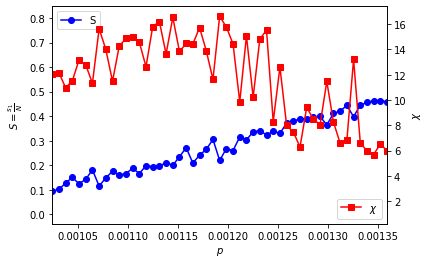

In [67]:
#testing the interval
plt.clf();
fig,ax = plt.subplots()
ax.plot(p_list,av_S,'o-',label = 'S', color = 'blue')
ax.set_ylabel(r'$S=\frac{s_1}{N}$')
ax2=ax.twinx()
ax2.plot(p_list,av_chi,'s-',label = r'$\chi$',color = 'red')
ax2.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$p$')
plt.xlim((p_list[begInt], p_list[endInt]))
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show();

In [68]:
#setting the interval
p_nei = p_list[begInt:endInt+1]
s_nei = av_S[begInt:endInt+1]

In [69]:
def getRMSE(fitted, x, y):
    return math.sqrt(np.mean((y- fitted(x)) ** 2))

In [70]:
est_S = {} #storing the estimated values by each model
err_model = [] #storing the error for each model
degRange = range(2,6)
p_iter = np.linspace(p_nei[0], p_nei[len(p_nei)-1], 1000)
for deg in degRange:
  #fitting the linear model
  model = np.poly1d(np.polyfit(p_nei, s_nei, deg))

  #getting the estimated results
  est_S[deg] = model(p_iter)

  #getting the RMSE for each model
  err_model.append(getRMSE(model, p_nei, s_nei))

<Figure size 432x288 with 0 Axes>

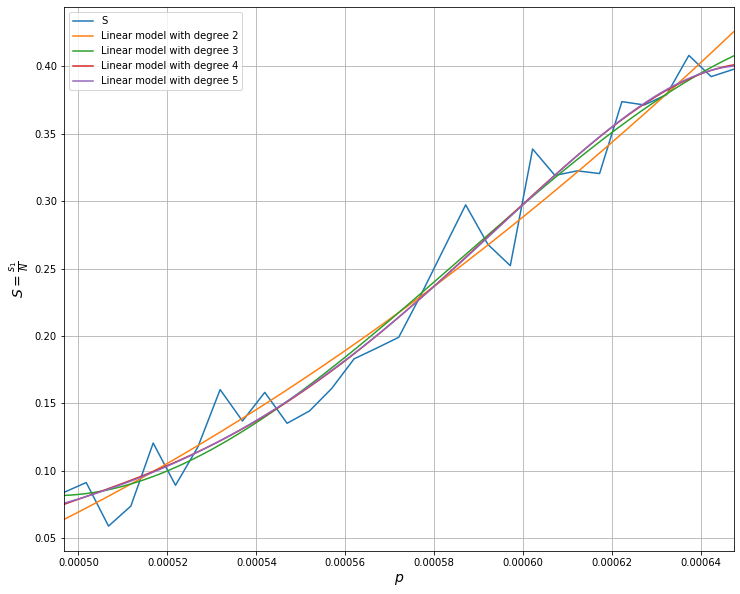

In [49]:
mult = 1.0
plt.clf()
plt.figure(figsize = (12, 10))
plt.xlabel(xlabel = r'$p$', fontsize = 14)
plt.ylabel(ylabel = r'$S=\frac{s_1}{N}$', fontsize = 14)
plt.plot(p_nei,s_nei,'-',label = 'S')
plt.xlim((p_nei[0], p_nei[len(p_nei)-1]))
for deg in degRange:
    plt.plot(p_iter, est_S[deg], label = "Linear model with degree " + str(deg))
plt.legend(loc = 0)
plt.grid()
plt.show()

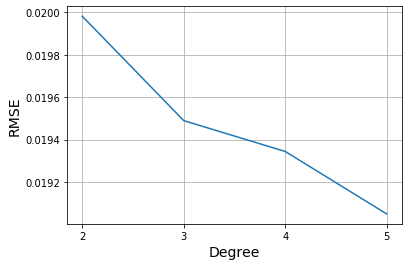

In [71]:
mult = 1.0
plt.clf()
plt.xlabel(xlabel = r'Degree', fontsize = 14)
plt.xticks(degRange)
plt.ylabel(ylabel = r'RMSE', fontsize = 14)
plt.plot(list(degRange), err_model)
plt.grid()
plt.show()

In [72]:
err_model[len(err_model)-1]

0.01904899843335957

In [73]:
import pandas as pd
df = pd.DataFrame({'Linear Degree' : degRange, 'Error' : err_model})    
df

,Linear Degree,Error
0,2,0.019982
1,3,0.019489
2,4,0.019344
3,5,0.019049


In [74]:
from scipy.optimize import curve_fit
#Source: https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509

In [75]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [76]:
pars, cov = curve_fit(f=power_law, xdata=p_nei, ydata=s_nei, p0=[0, 0], bounds=(-np.inf, np.inf), maxfev = 1500)
pow_model_est = power_law(p_iter, *pars)

In [77]:
pars

array([2.63620424e+13, 4.78813191e+00])

<Figure size 432x288 with 0 Axes>

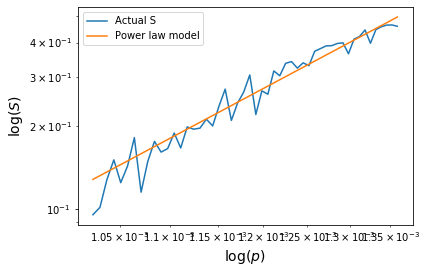

In [78]:
plt.clf()
fig,ax = plt.subplots()

# Set the x and y-axis scaling to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(xlabel = r'$\log(p)$', fontsize = 14)
plt.ylabel(ylabel = r'$\log(S)$', fontsize = 14)

# Set the axis limits
plt.plot(p_nei, s_nei, label = 'Actual S')
plt.plot(p_iter, pow_model_est, label = 'Power law model')
plt.legend(loc = 0)
plt.show()

In [79]:
math.sqrt(np.mean((s_nei - power_law(p_nei, *pars)) ** 2))

0.022615646535473113